# **Task 1**

In [ ]:
# Run the following command prior to running the colab
!python -m pip install matplotlib==3.5.3

!pip install matplotlib --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load Data Sets:

In [ ]:
from pandas._libs.algos import diff_2d
import numpy as np
import time
#the output of plotting commands is displayed inline within frontends
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging

#it is important to set the seed for reproducibility as it initializes the random number generator
np.random.seed(1234)

import sklearn
from sklearn.ensemble import RandomForestClassifier

from scipy.io import arff
import urllib.request
import io # for io.StringIO(
import pandas as pd

#Load the data from url and convert to pandas df
url="http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
col_name = ['Survival','Age','Sex','Steroid','Anitvirals','Fatigue','Malaise','Anorexia',
'Liver_Big','Liver_Firm','Spleen_Palpable','Spiders','Ascites','Varices','Bilirubin',
'Alk_Phosphate','SGOT','Albumin','Protime','Histology']

col_name1 = ['Age','Sex','Steroid','Anitvirals','Fatigue','Malaise','Anorexia',
'Liver_Big','Liver_Firm','Spleen_Palpable','Spiders','Ascites','Varices','Bilirubin',
'Alk_Phosphate','SGOT','Albumin','Protime','Histology']


df1 = pd.read_csv(url,
            names=col_name,index_col=False)

url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"

ftpstream = urllib.request.urlopen(url2)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

df2 = pd.DataFrame(data)

df2.columns = ['Quality', 'Retinalab',
              'MA_at_.5','MA_at_.6','MA_at_.7','MA_at_.8','MA_at_.9','MA_at_1',
               'Exudate_1','Exudate_2','Exudate_3','Exudate_4','Exudate_5','Exudate_6','Exudate_7','Exudate_8',
               'dist_Macula_opticdisc','opticdisc_diam','AM/FM','DR']

col_name2 = ['Quality', 'Retinalab',
              'MA_at_.5','MA_at_.6','MA_at_.7','MA_at_.8','MA_at_.9','MA_at_1',
               'Exudate_1','Exudate_2','Exudate_3','Exudate_4','Exudate_5','Exudate_6','Exudate_7','Exudate_8',
               'dist_Macula_opticdisc','opticdisc_diam','AM/FM']

#Convert DR column from str? to numeric
df2["DR"] = pd.to_numeric(df2["DR"])

y = df1['Survival']
y = pd.DataFrame(data = y)

y = df1['Survival'] - 1


#General Information:
#Survival of Hepatitis patients
# (include Fatigue and Anorexia for predicting features)
#Die = 1, Live = 2
#Male = 1, Female = 2
#In general, 1 = NO, 2 = YES

#df2
#Image detection of diabetic retinopathy (DR)
#19) DR 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.
#Determine which features correlate highly with DR


#Imputation for df1: Replaced missing ? values with most common for Sex-Varices and with the mean for Bilirubin-Protime
from sklearn.impute import SimpleImputer
df1 = df1.replace('?', np.nan)
df_Age = df1['Age']

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df1.loc[:, 'Sex':'Varices'])
SimpleImputer()
df_1 = imp.transform(df1.loc[:, 'Sex':'Varices'])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df1.loc[:,'Bilirubin':'Protime'])
SimpleImputer()
df_11 = imp.transform(df1.loc[:,'Bilirubin':'Protime'])

df_hist = df1['Histology']

#Convert to pandas dataframe
df_1 = pd.DataFrame(data=df_1)
df_11 = pd.DataFrame(data=df_11)
df_hist = pd.DataFrame(data = df_hist)

df_15 = pd.concat([y, df_Age, df_1, df_11, df_hist], axis=1)

df_15.columns = col_name

df_15 #hepatitis dataframe with all missing values changed to most frequent or means (same size as original dataframe)

,Survival,Age,Sex,Steroid,Anitvirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,1,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,1,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,1,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,1,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,50.000000,2
151,1,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,61.852273,2
152,1,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,61.852273,2
153,1,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


Summary of Datasets / Select most important *features*

df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Elapsed time to compute the importances: 0.011 seconds


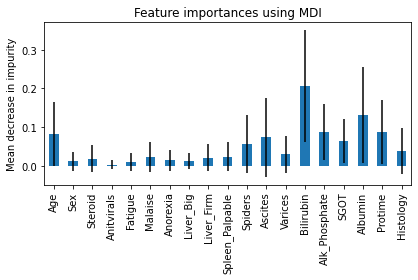

In [ ]:
from sklearn.preprocessing import StandardScaler
from numpy.ma.core import shape
import seaborn as sns

#Take out outliers
Q1 = df_15['Bilirubin'].quantile(0.01)
Q3 = df_15['Bilirubin'].quantile(0.99)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (df_15['Bilirubin'] >= Q1 - 1.5 * IQR) & (df_15['Bilirubin'] <= Q3 + 1.5 *IQR)
df_16 = df_15.loc[filter]

Q1 = df_16['Alk_Phosphate'].quantile(0.01)
Q3 = df_16['Alk_Phosphate'].quantile(0.99)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (df_16['Alk_Phosphate'] >= Q1 - 1.5 * IQR) & (df_16['Alk_Phosphate'] <= Q3 + 1.5 *IQR)
df_17 = df_16.loc[filter]


Q1 = df_17['SGOT'].quantile(0.01)
Q3 = df_17['SGOT'].quantile(0.99)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (df_17['SGOT'] >= Q1 - 1.5 * IQR) & (df_17['SGOT'] <= Q3 + 1.5 *IQR)
df_18 = df_17.loc[filter]


Q1 = df_18['Albumin'].quantile(0.01)
Q3 = df_18['Albumin'].quantile(0.99)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (df_18['Albumin'] >= Q1 - 1.5 * IQR) & (df_18['Albumin'] <= Q3 + 1.5 *IQR)
df_19 = df_18.loc[filter]


Q1 = df_19['Protime'].quantile(0.01)
Q3 = df_19['Protime'].quantile(0.99)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (df_19['Protime'] >= Q1 - 1.5 * IQR) & (df_19['Protime'] <= Q3 + 1.5 *IQR)
df_1111 = df_19.loc[filter]
df_1111

#Find the most important features for df1 - USE RANDOM FOREST CLASSIFIER
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df_1111.loc[:,'Age':]
Y = df_1111['Survival']
Y = pd.DataFrame(data = Y)
X = pd.DataFrame(data = X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, shuffle=True)

feature_names = col_name1
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig("RF for DF1",bbox_inches='tight', dpi=300)



X_cont = X[["Bilirubin","Alk_Phosphate","SGOT","Albumin","Protime"]]
X_age = X[["Age"]]
X_cat = X[['Sex','Steroid','Anitvirals','Fatigue','Malaise','Anorexia',
'Liver_Big','Liver_Firm','Spleen_Palpable','Spiders','Ascites','Varices']]
X_hist = X[["Histology"]]

scaler = StandardScaler()

X_cont_std = scaler.fit_transform(X_cont)
X_cont_std = pd.DataFrame(X_cont_std, columns = ["Bilirubin","Alk_Phosphate","SGOT","Albumin","Protime"])
X_age = scaler.fit_transform(X_age)
X_age = pd.DataFrame(X_age, columns = ["Age"])

X_cont_std

X_age
X_cat = X_cat.astype(int)
X_cat = X_cat - 1
X_cat

X_hist = X_hist.astype(int)
X_hist = X_hist -1
X_hist


X1_af = pd.concat([X_age, X_cat, X_cont_std, X_hist], axis=1)

X1_af         #<--- cleaned and standarzed dataframe 1 with all categorical variables 0 or 1      <--use X1_af for predicting accuracy of features in models


# #take out the values in Y that we took out to make X1_af, that is make X1_af and y the same size
X1_af.index.tolist()
y.index.tolist()
y_indices = set(y.index.tolist()).intersection(X1_af.index.tolist())
y_indices
y_index = list(y_indices)
Y1 = y.loc[y_index]

X1_af = pd.DataFrame(data=X1_af)
X1_af.columns = col_name1


X1_std = X1_af.loc[:,['Age','SGOT','Bilirubin','Spiders']]        #Create a standardized version of X called - X1_std - (Note: this only has the four most important features)

from imblearn.over_sampling import SMOTE          #Created balanced dataset for dataset 1, X1_afs and Y1s
sm = SMOTE(random_state=42)
X1_afs, Y1s = sm.fit_resample(X1_af, Y1)


#Summary Statistics for df1 ---
# df1.info()

# df1.describe()
# #The mean age of patients is 40.6625 years old with a standard deviation of 11.28 years, the youngest is 20 yrs and oldest is 72 yrs

# df1.Survival.value_counts(normalize = True)
# #83.75% of patients died while 16.25% of patients survived

# df1['Sex'].value_counts()
# #There were 69 male patients and 11 female patients

# df1['Survival'].value_counts()

**Created balanced dataset for dataset 1, X1_afs and Y1s**

Distribution of features in original df_15

In [ ]:
data = ['Steroid',	'Anitvirals','Fatigue',	'Malaise', 'Anorexia', 'Liver_Big',	'Liver_Firm',	'Spleen_Palpable',	'Spiders',	'Ascites',	'Varices', 'Histology']

for feature in data:
  print(X1_afs[feature].value_counts())



0    154
1     92
Name: Steroid, dtype: int64
1    207
0     39
Name: Anitvirals, dtype: int64
0    192
1     54
Name: Fatigue, dtype: int64
0    145
1    101
Name: Malaise, dtype: int64
1    172
0     74
Name: Anorexia, dtype: int64
1    214
0     32
Name: Liver_Big, dtype: int64
1    138
0    108
Name: Liver_Firm, dtype: int64
1    151
0     95
Name: Spleen_Palpable, dtype: int64
0    137
1    109
Name: Spiders, dtype: int64
1    174
0     72
Name: Ascites, dtype: int64
1    179
0     67
Name: Varices, dtype: int64
1    130
0    116
Name: Histology, dtype: int64


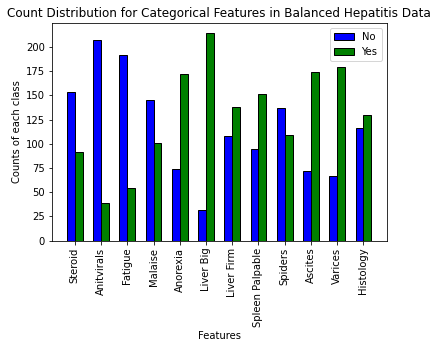

In [ ]:
X1_afs
#In general, 0 = NO, 1 = YES
No = [154, 207, 192, 145, 74, 32, 108, 95, 137, 72, 67, 116]
Yes = [92, 39, 54,   101, 172, 214, 138, 151, 109, 174, 179, 130]

n=12
r = np.arange(12)
width = 0.30

plt.bar(r, No, color = 'b',
        width = width, edgecolor = 'black',
        label='No')
plt.bar(r + width, Yes, color = 'g',
        width = width, edgecolor = 'black',
        label='Yes')

plt.xlabel("Features")
plt.ylabel("Counts of each class")
plt.title("Count Distribution for Categorical Features in Balanced Hepatitis Data")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Steroid',	'Anitvirals','Fatigue',	'Malaise', 'Anorexia', 'Liver Big',	'Liver Firm',	'Spleen Palpable',	'Spiders',	'Ascites',	'Varices', 'Histology'], rotation = 'vertical')
fig.set_size_inches(10, 20)
plt.legend()
plt.savefig('Count Distribution for Categorical Features in Balanced Hepatitis Data.png',dpi=300,bbox_inches='tight')
plt.show()

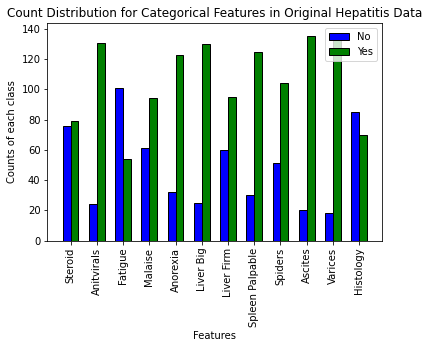

In [ ]:
X1_afs
#In general, 0 = NO, 1 = YES
No = [76, 24, 101, 61, 32, 25, 60, 30, 51, 20, 18, 85]
Yes = [79, 131, 54, 94, 123, 130, 95, 125, 104, 135, 137, 70]

n=12
r = np.arange(12)
width = 0.30

plt.bar(r, No, color = 'b',
        width = width, edgecolor = 'black',
        label='No')
plt.bar(r + width, Yes, color = 'g',
        width = width, edgecolor = 'black',
        label='Yes')

plt.xlabel("Features")
plt.ylabel("Counts of each class")
plt.title("Count Distribution for Categorical Features in Original Hepatitis Data")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Steroid',	'Anitvirals','Fatigue',	'Malaise', 'Anorexia', 'Liver Big',	'Liver Firm',	'Spleen Palpable',	'Spiders',	'Ascites',	'Varices', 'Histology'], rotation = 'vertical')
fig.set_size_inches(10, 20)
plt.legend()
plt.savefig('Count Distribution for Categorical Features in Original Hepatitis Data.png',dpi=300,bbox_inches='tight')
plt.show()

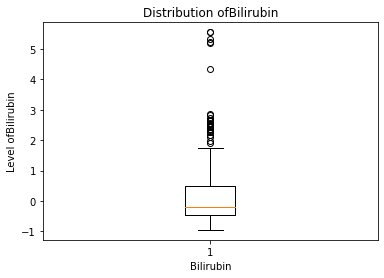

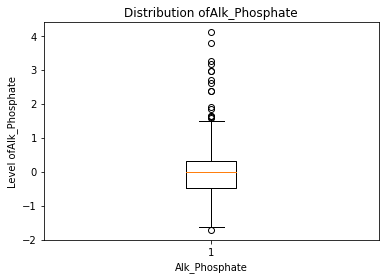

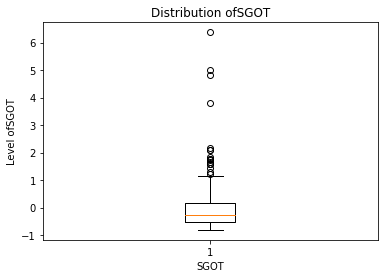

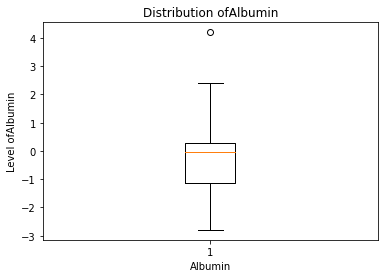

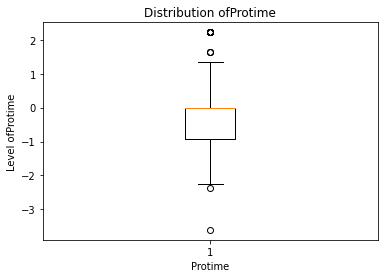

In [ ]:
data = ['Bilirubin',	'Alk_Phosphate',	'SGOT',	'Albumin',	'Protime']

for feature in data:
  plt.boxplot(X1_afs[feature])
  plt.xlabel(feature)
  plt.ylabel("Level of" + feature)
  plt.title("Distribution of" + feature)
  plt.savefig(f'Distribution of {feature}.png',dpi=300,bbox_inches='tight')
  plt.show()

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Elapsed time to compute the importances: 0.055 seconds


,Quality,Retinalab,MA_at_.5,MA_at_.6,MA_at_.7,MA_at_.8,MA_at_.9,MA_at_1,Exudate_1,Exudate_2,Exudate_3,Exudate_4,Exudate_5,Exudate_6,Exudate_7,Exudate_8,dist_Macula_opticdisc,opticdisc_diam,AM/FM
0,0.059054,0.298213,-0.641486,-0.618782,-0.576463,-0.630029,-0.551116,-0.473745,-0.242917,-0.246003,-0.296966,-0.271509,-0.218324,-0.194409,-0.205124,-0.186169,-1.294763,-0.468656,1.405048
1,0.059054,0.298213,-0.563391,-0.535778,-0.576463,-0.677410,-0.653676,-0.539992,-0.109250,0.032972,-0.465224,-0.408593,-0.224256,-0.197212,-0.205175,-0.186281,-0.082168,2.006054,-0.711719
2,0.059054,0.298213,0.920417,0.958299,1.046665,1.028299,0.936006,0.784951,-0.141383,0.227196,0.344463,0.769037,0.335538,0.152330,-0.110043,-0.164808,0.274283,1.121516,-0.711719
3,0.059054,0.298213,0.647084,0.667784,0.783456,0.838776,0.730886,0.652456,-0.404199,-0.214977,0.035830,0.316953,0.112573,0.056919,-0.195765,-0.199541,-1.423814,0.354501,-0.711719
4,0.059054,0.298213,0.217561,0.294265,0.388641,0.412349,0.525766,0.387468,-0.788069,-0.672306,-0.717335,-0.468311,-0.225828,-0.200905,-0.214968,-0.208100,-1.685874,0.844102,-0.711719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.059054,0.298213,-0.172915,-0.120756,-0.050043,0.033302,0.115525,0.188727,-0.992560,-1.025806,-0.750133,-0.467516,-0.225828,-0.200905,-0.214968,-0.208100,0.508422,0.466281,-0.711719
1147,0.059054,0.298213,0.412798,0.501776,0.607982,0.791395,0.833446,1.049939,-0.015387,0.198657,-0.055085,-0.218523,-0.225203,-0.200905,-0.214968,-0.208100,-0.231045,0.878556,-0.711719
1148,0.059054,-3.353309,0.412798,0.460274,0.564114,0.601872,0.730886,0.784951,-0.575348,-0.422401,-0.600326,-0.433156,-0.221309,-0.200905,-0.214968,-0.208100,1.334363,1.193713,-0.711719
1149,0.059054,0.298213,0.022323,-0.037752,-0.269384,-0.440506,-0.807516,-0.937474,-0.403199,-0.485477,-0.342804,-0.193527,0.001120,0.108426,0.386140,0.767878,-1.327962,-0.097078,1.405048


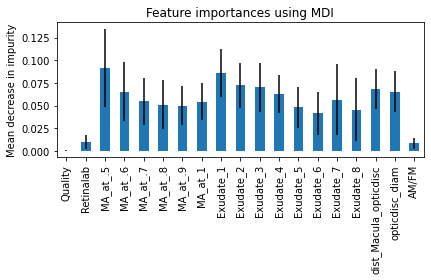

In [ ]:
from sklearn.preprocessing import StandardScaler
#Separate df2 into X2 and Y2
#X2 is cleaned DF2 with all features
#X22 is cleaned DF2 with 4 most important features


X2 = df2.loc[:,'Quality':'AM/FM']         #***(X2 is a cleaned dataset 2 with all of the features)***
Y2 = df2['DR']

scaler = StandardScaler()
X2_std = scaler.fit_transform(X2)         #***(X2_std is a cleaned and standarized dataset 2 with all of the features)***. <--- Use this for accuracy prediction -- use X2_std --
X2_std = pd.DataFrame(data=X2_std)
X2_std.columns = col_name2
Y2 = pd.DataFrame(data = Y2)




#Find the most important features for df2

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state=1, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in range(X.shape[1])]
# feature_names = col_name2
forest = RandomForestClassifier(random_state=0)
forest.fit(X2_train, Y2_train)
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=col_name2)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig("RF for DF2",bbox_inches='tight', dpi=300)



# #Modified df2 with most important features
X22_std = X2_std.loc[:,['MA_at_.5','Exudate_1','dist_Macula_opticdisc','opticdisc_diam']]
X22_std = pd.DataFrame(data=X22_std)
X22_std.columns = ['MA_at_.5','Exudate_1','dist_Macula_opticdisc','opticdisc_diam']              #***(This is a cleaned and standarized dataset 2 with most important features)***
Y2 = pd.DataFrame(data = Y2)



X22_std
X2_std

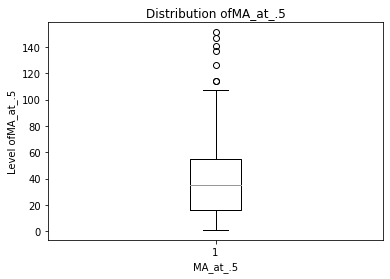

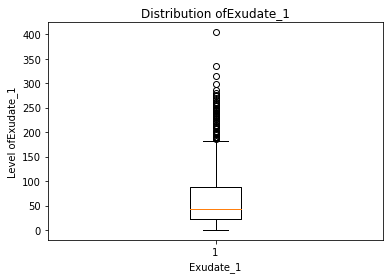

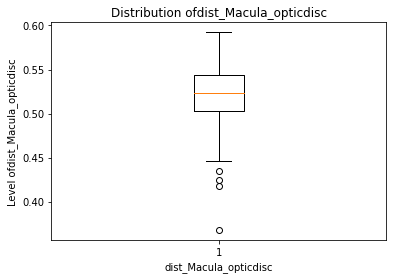

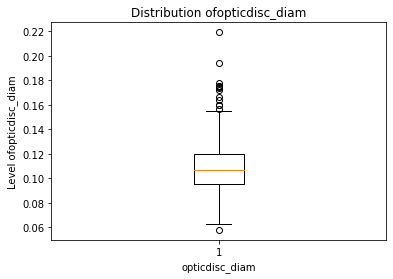

In [ ]:
data = ['MA_at_.5',	'Exudate_1',	'dist_Macula_opticdisc',	'opticdisc_diam']

for feature in data:
  plt.boxplot(X2[feature])
  plt.xlabel(feature)
  plt.ylabel("Level of" + feature)
  plt.title("Distribution of" + feature)
  plt.savefig(f'Distribution of {feature}.png',dpi=300,bbox_inches='tight')
  plt.show()

# **Task 2**

#Implementation of KNN



The KNN class

We implement our models as python classes. Two class methods that we usually need to implement are fit and predict; which respectively perform training by fitting the data, and making prediction on new data. In the __init__ function, we initialize our model, usually this includes an assignment to hyper-parameters.

In [ ]:
from scipy.linalg.decomp import empty
from re import A

from sklearn.metrics import roc_curve, roc_auc_score
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return


    def fit(self, X, y):
        ''' Store the training data using this method as it is a lazy learner'''  #all the training that KNN does is remember the data
        self.X = X
        self.y = y
        self.C = 2  #number of classes of output y
        return self


    def predict(self, X_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''  #using stored data, makes prediction from x_test
        num_test = X_test.shape[0]    #number of rows or observations for testing data, the number of testing samples

        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = np.zeros((num_test,self.X.shape[0]))
        for i in range (num_test):
          for j in range (self.X.shape[0]):
            distances[i][j] = self.dist_fn(X_test[i],self.X[j])

        #Create knn, ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)

        #Create array for predicted Y_Predicted
        Y_Predicted = np.zeros((num_test))



        #Create y_prob, ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]

            #np bin count goes wrong here as survival ranges from 1-2, but bincount(arr) returns an array as large as the largest element+1 in arr
            #use np unique instead. Np unique returns an array with all the unique elements extracted from the array. Return_counts options return
            #the number of times each of the unique values comes up in the original array
            #values are the result y lables, while counts are the corresponding frequency of lables

            values, counts = np.unique(self.y[knns[i,:]], return_counts=True)
            # print('Corresponding survival status of knn')
            # print(self.y[knns[i,:]])
            for c in range(self.C):
              Classindex = np.where(values == c)[0]
              if (Classindex.shape[0] == 0):
                y_prob[i][c] = 0
              else:
                y_prob[i][c] = counts[Classindex[0]]/self.K

            mode_indice = np.argmax(counts)
            Y_Predicted[i] = values[mode_indice]
            # print('Survival probabilities')
            # print(y_prob[i,:])
            # print('Survival prediction')
            # print(Y_Predicted[i])

        return y_prob, knns, Y_Predicted


    def evaluate_acc(self, Y_predicted, Y_test):
        acc =  np.sum(Y_predicted == Y_test)/Y_test.shape[0]
        return acc




#Verify knn on df1

Shape of X_train: (124, 4)
Shape of X_test: (31, 4)
knns shape: (31, 10)
y_prob shape: (31, 2)
Y_predicted: (31,)
Y predicted
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Y_test
[1 1 1 0 0 1 1 0 1 1 1 1 1 1 1]
accuracy is 0.871.
[[0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.4 0.6]
 [0.1 0.9]
 [0.2 0.8]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.4 0.6]
 [0.  1. ]
 [0.5 0.5]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 [0.1 0.9]
 [0.1 0.9]
 [0.  1. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.3 0.7]
 [0.1 0.9]
 [0.2 0.8]
 [0.6 0.4]
 [0.  1. ]
 [0.2 0.8]
 [0.  1. ]
 [0.  1. ]]


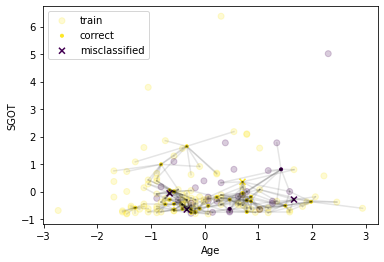

In [ ]:
from sklearn.model_selection import train_test_split
#Validate that knn is working for DF1
myK = 10

model = KNN(K=myK)


#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X1_std, Y1, test_size = 0.2, random_state=1, shuffle=True)

Y_train = Y_train.to_numpy()
# Y_train = Y_train.Survival.astype(int).to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Y_test = Y_test.Survival.astype(int).to_numpy()
Y_test = Y_test.to_numpy()
N_test_samples = X_test.shape[0]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

model.fit(X_train, Y_train)
y_prob, knns , Y_predicted = model.predict(X_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)
print('Y_predicted:', Y_predicted.shape)

print('Y predicted')
print(Y_predicted[0:15])
print('Y_test')
print(Y_test[0:15])

#To get hard predictions by choosing the class with the maximum probability
accuracy = model.evaluate_acc(Y_predicted,Y_test)
print(f'accuracy is {accuracy:.3f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = Y_test == Y_predicted
incorrect = np.logical_not(correct)

#TODO: visualization of the points
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, marker='o', alpha=.2, label='train')     #plot x_training points
plt.scatter(X_test[correct,0], X_test[correct,1], marker='.', c=Y_predicted[correct], label='correct')   #plot correctly classified testing points
plt.scatter(X_test[incorrect,0], X_test[incorrect,1], marker='x', c=Y_test[incorrect], label='misclassified')   #plot incorrectly classified testing points

#connect each node to k-nearest neighbours in the training set      for each point in x_test, connect it to k-nearest neighbors in training set
for i in range(X_test.shape[0]):
    for k in range(model.K):
        hor = X_test[i,0], X_train[knns[i,k],0]
        ver = X_test[i,1], X_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)

plt.ylabel('SGOT')
plt.xlabel('Age')
plt.legend()
plt.savefig('df1_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

print(y_prob)

##Verify knn on df2

In [ ]:
X2_std

,Quality,Retinalab,MA_at_.5,MA_at_.6,MA_at_.7,MA_at_.8,MA_at_.9,MA_at_1,Exudate_1,Exudate_2,Exudate_3,Exudate_4,Exudate_5,Exudate_6,Exudate_7,Exudate_8,dist_Macula_opticdisc,opticdisc_diam,AM/FM
0,0.059054,0.298213,-0.641486,-0.618782,-0.576463,-0.630029,-0.551116,-0.473745,-0.242917,-0.246003,-0.296966,-0.271509,-0.218324,-0.194409,-0.205124,-0.186169,-1.294763,-0.468656,1.405048
1,0.059054,0.298213,-0.563391,-0.535778,-0.576463,-0.677410,-0.653676,-0.539992,-0.109250,0.032972,-0.465224,-0.408593,-0.224256,-0.197212,-0.205175,-0.186281,-0.082168,2.006054,-0.711719
2,0.059054,0.298213,0.920417,0.958299,1.046665,1.028299,0.936006,0.784951,-0.141383,0.227196,0.344463,0.769037,0.335538,0.152330,-0.110043,-0.164808,0.274283,1.121516,-0.711719
3,0.059054,0.298213,0.647084,0.667784,0.783456,0.838776,0.730886,0.652456,-0.404199,-0.214977,0.035830,0.316953,0.112573,0.056919,-0.195765,-0.199541,-1.423814,0.354501,-0.711719
4,0.059054,0.298213,0.217561,0.294265,0.388641,0.412349,0.525766,0.387468,-0.788069,-0.672306,-0.717335,-0.468311,-0.225828,-0.200905,-0.214968,-0.208100,-1.685874,0.844102,-0.711719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.059054,0.298213,-0.172915,-0.120756,-0.050043,0.033302,0.115525,0.188727,-0.992560,-1.025806,-0.750133,-0.467516,-0.225828,-0.200905,-0.214968,-0.208100,0.508422,0.466281,-0.711719
1147,0.059054,0.298213,0.412798,0.501776,0.607982,0.791395,0.833446,1.049939,-0.015387,0.198657,-0.055085,-0.218523,-0.225203,-0.200905,-0.214968,-0.208100,-0.231045,0.878556,-0.711719
1148,0.059054,-3.353309,0.412798,0.460274,0.564114,0.601872,0.730886,0.784951,-0.575348,-0.422401,-0.600326,-0.433156,-0.221309,-0.200905,-0.214968,-0.208100,1.334363,1.193713,-0.711719
1149,0.059054,0.298213,0.022323,-0.037752,-0.269384,-0.440506,-0.807516,-0.937474,-0.403199,-0.485477,-0.342804,-0.193527,0.001120,0.108426,0.386140,0.767878,-1.327962,-0.097078,1.405048


Shape of X_train: (920, 19)
Shape of X_test: (231, 19)
knns shape: (231, 4)
y_prob shape: (231, 2)
Y_predicted: (231,)
Y predicted
[0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0.]
Y_test
[1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 1 1 0 0 0 1 1]
accuracy is 0.632.


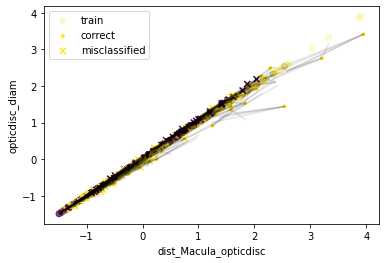

In [ ]:
from sklearn.model_selection import train_test_split
#Validate that knn is working for DF1
myK = 4

model = KNN(K=myK)

#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X2_std, Y2, test_size = 0.2, random_state=1, shuffle=True)
Y_train = Y_train.DR.astype(int).to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.DR.astype(int).to_numpy()
N_test_samples = X_test.shape[0]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

model.fit(X_train, Y_train)
y_prob, knns , Y_predicted= model.predict(X_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)
print('Y_predicted:', Y_predicted.shape)

print('Y predicted')
print(Y_predicted[0:50])
print('Y_test')
print(Y_test[0:50])

#To get hard predictions by choosing the class with the maximum probability
accuracy = model.evaluate_acc(Y_predicted,Y_test)
print(f'accuracy is {accuracy:.3f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = Y_test == Y_predicted
incorrect = np.logical_not(correct)

#TODO: visualization of the points
plt.scatter(X_train[:,3], X_train[:,3], c=Y_train, marker='o', alpha=.2, label='train')     #plot x_training points
plt.scatter(X_test[correct,3], X_test[correct,4], marker='.', c=Y_predicted[correct], label='correct')   #plot correctly classified testing points
plt.scatter(X_test[incorrect,3], X_test[incorrect,4], marker='x', c=Y_test[incorrect], label='misclassified')   #plot incorrectly classified testing points

#connect each node to k-nearest neighbours in the training set      for each point in x_test, connect it to k-nearest neighbors in training set
for i in range(X_test.shape[0]):
    for k in range(model.K):
        hor = X_test[i,3], X_train[knns[i,k],3]
        ver = X_test[i,4], X_train[knns[i,k],4]
        plt.plot(hor, ver, 'k-', alpha=.1)

plt.ylabel('opticdisc_diam')
plt.xlabel('dist_Macula_opticdisc')
plt.legend()
plt.savefig('df2_KNN'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

#Implementation of DT


In [ ]:

class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency (how many of each) of different labels in the region defined by this node
                                                                                            #12 Survive, 7 die
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node       #np.sum(class_prob) gives the total number of counts in this node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


In [ ]:
def greedy_test(node, cost_fn):
#initialize the best parameter values
    best_cost = np.inf    #set initial best cost equal to infinity
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.   #average of consecutive sorted feature values
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=20, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination

    #Data is X_train, lables are Y_train, dimension N
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.unique(labels).shape[0]
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')

        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value     #this returns [True, False, True,...]

        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right


    def predict(self, X_test):

        class_probs = np.zeros((X_test.shape[0], self.num_classes))

        Y_predicted = np.zeros((X_test.shape[0]))
        for n, x in enumerate(X_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right

            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
            Y_predicted[n] = class_probs[n].argmax()

        return class_probs, Y_predicted      #numpy array of class probabilities [.34,.25,.22,...]


    def evaluate_acc(self, Y_predicted, Y_test):
        acc =  np.sum(Y_predicted == Y_test)/Y_test.shape[0]
        return acc


In [ ]:
treeD = DecisionTree()


#Verification of DT for *df1*


In [ ]:
from sklearn.model_selection import train_test_split

X1_af
Y1

X1_BiliAlb = X1_af[["Bilirubin","Albumin"]]

X1_BiliAlb = X1_BiliAlb.to_numpy()
Y1 = Y1.to_numpy()



Y1 = np.reshape(Y1, (155))


(num_instances, num_features), num_classes = X1_af.shape, 2

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_BiliAlb, Y1, test_size = 0.2, random_state=1, shuffle=True)


print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)


(124, 2)
(31, 2)
(124,)
(31,)


Fit the tree to the training data and predict on the test data


accuracy is 87.1.


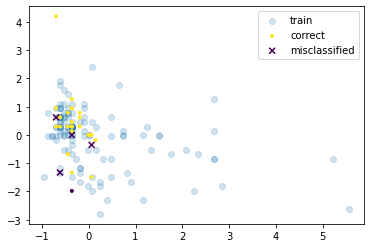

In [ ]:
tree = DecisionTree(max_depth = 4)

probs1_test, _ = tree.fit(X1_train, Y1_train).predict(X1_test)

probs1_test.shape

Y1_pred = np.argmax(probs1_test,1)
accuracy = np.sum(Y1_pred == Y1_test) / Y1_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

correct = (Y1_test == Y1_pred)
incorrect = np.logical_not(correct)

plt.scatter(X1_train[:,0], X1_train[:,1], marker='o', alpha=.2, label='train')
plt.scatter(X1_test[correct,0], X1_test[correct,1], marker='.', c=Y1_pred[correct], label='correct')
plt.scatter(X1_test[incorrect,0], X1_test[incorrect,1], marker='x', c=Y1_test[incorrect], label='misclassified')
plt.legend()
plt.show()

Plot the decision boundary for DT for DF1

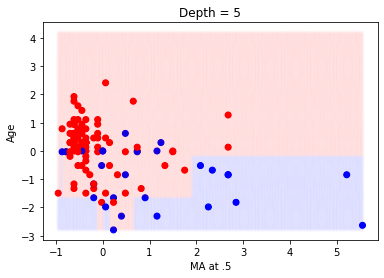

In [ ]:
x0v = np.linspace(np.min(X1_BiliAlb[:,0]), np.max(X1_BiliAlb[:,0]), 200)
x1v = np.linspace(np.min(X1_BiliAlb[:,1]), np.max(X1_BiliAlb[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


for tree_depth in [5]:
    model = DecisionTree(max_depth=tree_depth)

    y_train_prob = np.zeros((Y1_train.shape[0], num_classes))       #y_train_prob
    y_train_prob[np.arange(Y1_train.shape[0]), Y1_train] = 1
    y_prob_all, _ = model.fit(X1_train, Y1_train).predict(x_all)    #y_prob_all


#create a for loop that goes through y_train_prob and for each value assigns colors [0,1] = red, [1,0] = blue
    color = []
    for i in range(y_train_prob.shape[0]):
        if (y_train_prob[i,0] == 1): color.append("blue")
        else: color.append("red")

    colors = []
    for i in range(y_prob_all.shape[0]):
        if (y_prob_all[i,0] == 1): colors.append("blue")
        else: colors.append("red")

    plt.scatter(X1_train[:,0], X1_train[:,1], c=color, marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=colors, marker='.', alpha=.01)

    plt.ylabel('Age')
    plt.xlabel('MA at .5')
    plt.title('Depth = ' + str(tree_depth))
    plt.savefig('iris_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)




#**Verification of DT for df2**

In [ ]:
X2_std.shape

(1151, 19)

In [ ]:
#Final data for first data --> Afer taking out missing, outliers, feature selection and standardization
X2_std
Y2

X2_std = pd.DataFrame(data=X2_std)
X2_std.columns = col_name2
X2_std

X2_MaEx = X2_std[["MA_at_.5","Exudate_1"]]

X2_MaEx = X2_MaEx.to_numpy()
Y2 = Y2.to_numpy()
Y2 = np.reshape(Y2, (1151))     #Y2 is numpy array with shape (1151,)
                                #X22_std is numpy array with shape (1151,4)

(num_instances, num_features), num_classes = X2_std.shape, np.max(Y2) + 1

from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_MaEx, Y2, test_size = 0.2, random_state=1, shuffle=True)


N_training_points= X2_train.shape[0]
N_testing_points = X2_test.shape[0]
# Y2_train = Y2_train.iloc[:,0]
# Y2_test = Y2_test.iloc[:,0]



Fit the tree to the training data and predict on the test data




accuracy is 59.7.


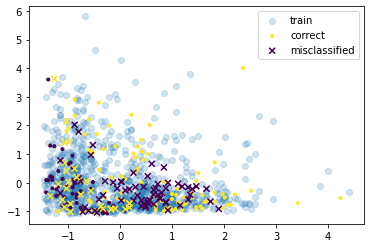

Shape of probs_test: (231, 2)
Shape of Y_pred: (231,)
Y predicted
[1 1 1 1 0 0 0 0 0 1 1 1 1 1 1]
Y_test
[1 0 1 0 0 0 0 0 0 1 0 1 0 0 1]
accuracy is 59.7.


In [ ]:
tree = DecisionTree(max_depth = 6)
probs2_test, _ = tree.fit(X2_train, Y2_train).predict(X2_test)

probs2_test.shape

Y2_pred = np.argmax(probs2_test,1)      #go along the columns of probs2_test and return the argument of the greatest value
accuracy = np.sum(Y2_pred == Y2_test) / Y2_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

correct = Y2_test == Y2_pred
incorrect = np.logical_not(correct)
plt.scatter(X2_train[:,0], X2_train[:,1], marker='o', alpha=.2, label='train')
plt.scatter(X2_test[correct,0], X2_test[correct,1], marker='.', c=Y2_pred[correct], label='correct')
plt.scatter(X2_test[incorrect,0], X2_test[incorrect,1], marker='x', c=Y2_test[incorrect], label='misclassified')
plt.legend()
plt.show()



# tree = tree.fit(X2_train, Y2_train)
# probs2_test, Y2_pred = tree.predict(X2_test)

print('Shape of probs_test:', probs2_test.shape)
print('Shape of Y_pred:', Y2_pred.shape)

print('Y predicted')
print(Y2_pred[0:15])
print('Y_test')
print(Y2_test[0:15])


#To get hard predictions by choosing the class with the maximum probability
accuracy = tree.evaluate_acc(Y2_pred,Y2_test)
print(f'accuracy is {accuracy*100:.1f}.')


We then plot the decision boundary for the DT for DF2


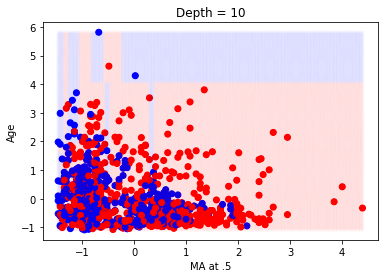

In [ ]:
x0v = np.linspace(np.min(X2_MaEx[:,0]), np.max(X2_MaEx[:,0]), 200)
x1v = np.linspace(np.min(X2_MaEx[:,1]), np.max(X2_MaEx[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


for tree_depth in [10]:
    model = DecisionTree(max_depth=tree_depth)
    y_train_prob = np.zeros((Y2_train.shape[0], num_classes))
    y_train_prob[np.arange(Y2_train.shape[0]), Y2_train] = 1
    y_prob_all, _ = model.fit(X2_train, Y2_train).predict(x_all)

#create a for loop that goes through y_train_prob and for each value assigns colors [0,1] = red, [1,0] = blue
    color = []
    for i in range(y_train_prob.shape[0]):
        if (y_train_prob[i,0] == 1): color.append("blue")
        else: color.append("red")

    colors = []
    for i in range(y_prob_all.shape[0]):
        if (y_prob_all[i,0] == 1): colors.append("blue")
        else: colors.append("red")

    plt.scatter(X2_train[:,0], X2_train[:,1], c=color, marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=colors, marker='.', alpha=.01)

    plt.ylabel('Age')
    plt.xlabel('MA at .5')
    plt.title('Depth = ' + str(tree_depth))
    plt.savefig('iris_tree_depth' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)


# **Task 3: Running Experiments**

Use X1_afs and Y1s for fittings models --> this is the balanced and standarized data for dataset 1 (all features)

Use X2_std and Y2 for fitting modes --> this is standarized data for dataset 2 (all features)

# **Compare accuracy of KNN and DT algorithm on DF1**

Before comparing the accuracies of the models, to find the best models for each --> find the best K and depth and best features !

1.) Select most important features and train model with these features

2.) Use the validation set to pick best K and depth

3.) Plot ROC, AUROC etc... to compare performances

#Compute accuracies of KNN & DT

In [ ]:
from sklearn.model_selection import train_test_split
#Validate that knn is working for DF1

#set the k value and create KNN object
myK = 10
model = KNN(K=myK)

#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X1_afs, Y1s, test_size = 0.2, random_state=1, shuffle=True)

#conversions to numpy
Y_train = Y_train.to_numpy()
# Y_train = Y_train.Survival.astype(int).to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Y_test = Y_test.Survival.astype(int).to_numpy()
Y_test = Y_test.to_numpy()
N_test_samples = X_test.shape[0]


model.fit(X_train, Y_train)
y_prob, knns , Y_predicted = model.predict(X_test)

accuracy = model.evaluate_acc(Y_predicted,Y_test)
print(f'accuracy is {accuracy:.3f}.')


accuracy is 0.900.


In [ ]:
tree = DecisionTree(max_depth = 4)

probs1_test, _ = tree.fit(X1_train, Y1_train).predict(X1_test)

probs1_test.shape

Y1_pred = np.argmax(probs1_test,1)
accuracy = np.sum(Y1_pred == Y1_test) / Y1_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')


accuracy is 87.1.


In [ ]:
from sklearn.model_selection import train_test_split
#Validate that knn is working for DF1

#set the k value and create KNN object
myK = 10
model = KNN(K=myK)

#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X2_std, Y2, test_size = 0.2, random_state=1, shuffle=True)

#conversions to numpy
Y_train = Y_train.to_numpy()
# Y_train = Y_train.Survival.astype(int).to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Y_test = Y_test.Survival.astype(int).to_numpy()
Y_test = Y_test.to_numpy()
N_test_samples = X_test.shape[0]


model.fit(X_train, Y_train)
y_prob, knns , Y_predicted = model.predict(X_test)

accuracy = model.evaluate_acc(Y_predicted,Y_test)
print(f'accuracy is {accuracy:.3f}.')

AttributeError: ignored

In [ ]:
#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X2_std, Y2, test_size = 0.2, random_state=1, shuffle=True)

#conversions to numpy
Y_train = Y_train.to_numpy()
# Y_train = Y_train.Survival.astype(int).to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Y_test = Y_test.Survival.astype(int).to_numpy()
Y_test = Y_test.to_numpy()
N_test_samples = X_test.shape[0]

tree = DecisionTree(max_depth = 4)
probs1_test, _ = tree.fit(X1_train, Y1_train).predict(X1_test)

Y1_pred = np.argmax(probs1_test,1)
accuracy = np.sum(Y1_pred == Y1_test) / Y1_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')


#Compare Accuracies of KNN & DT -- ROC curves

---



In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Use X1_afs and Y1s for fitting the model, this is the balanced and standarized data for dataset 1 (all features)
# Use X2_std and Y2 for fitting model --> this is standarized data for dataset 2 (all features)


#Define a cross validation function
def cross_validate(model, X, Y):
  kf = KFold(n_splits=5, random_state=1, shuffle=True)
  y = np.array([0] * X.shape[0])
  yh = np.array([0.0] * X.shape[0])
  for train_index, test_index in kf.split(X):
    model.fit(X[train_index], Y[train_index])
    y[test_index] = Y[test_index]
    yh[test_index] = model.predict(X[test_index])[0][:,1]
  return y,yh

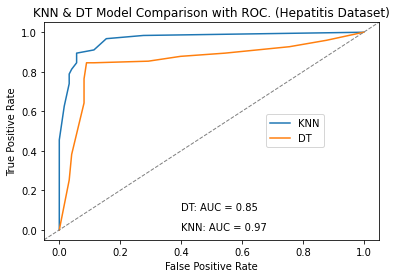

In [ ]:
#EVALUATE THE ROC CURVES FOR BOTH MODELS ON DATASET1

#define the models and their parameters
knn_model_df1 = KNN(K=10)
dt_model_df1 = DecisionTree(max_depth = 6)
performances_roc_df1 = {}

#conversions to numpy for df1
X1_afs_new = X1_afs.to_numpy()
Y1s_new = Y1s.to_numpy()

#run roc calculations for knn model
labels_1, prediction_scores_1 = cross_validate(knn_model_df1, X1_afs_new, Y1s_new)
fpr_1, tpr_1, _ = roc_curve(labels_1, prediction_scores_1)
auc_1 = roc_auc_score(labels_1, prediction_scores_1)
performances_roc_df1['knn'] = {'fpr': fpr_1, 'tpr':tpr_1, 'auc': auc_1}


#run roc calculations for dt model
labels_2, prediction_scores_2 = cross_validate(dt_model_df1, X1_afs_new, Y1s_new)
fpr_2, tpr_2, _ = roc_curve(labels_2, prediction_scores_2)
auc_2 = roc_auc_score(labels_2, prediction_scores_2)
performances_roc_df1['dt'] = {'fpr': fpr_2, 'tpr':tpr_2, 'auc': auc_2}


fig = plt.figure()
plt.plot(performances_roc_df1['knn']['fpr'], performances_roc_df1['knn']['tpr'], label="KNN")
plt.text(0.4, 0, "KNN" + ': AUC = '+str(round(performances_roc_df1['knn']['auc'],2)))

plt.plot(performances_roc_df1['dt']['fpr'], performances_roc_df1['dt']['tpr'], label="DT")
plt.text(0.4, 0.1, "DT" + ': AUC = '+str(round(performances_roc_df1['dt']['auc'],2)))

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('KNN & DT Model Comparison with ROC. (Hepatitis Dataset)')
plt.savefig('roc_multimethods_df1.png', bbox_inches='tight', dpi=300)


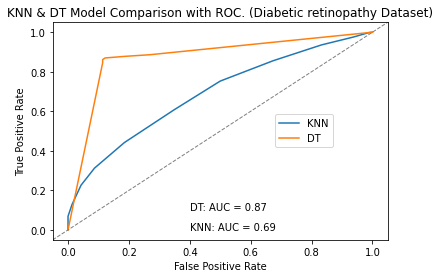

In [ ]:
#EVALUATE THE ROC CURVES FOR BOTH MODELS ON DATASET 2

#define the models and their parameters
knn_model_df2 = KNN(K=11)
dt_model_df2 = DecisionTree(max_depth = 13)
performances_roc_df2 = {}

#conversions to numpy for df2
X2_std_new = X2_std.to_numpy()

#run roc calculations for knn model
labels_1, prediction_scores_1 = cross_validate(knn_model_df2, X2_std_new, Y2)
fpr_1, tpr_1, _ = roc_curve(labels_1, prediction_scores_1)
auc_1 = roc_auc_score(labels_1, prediction_scores_1)
performances_roc_df2['knn'] = {'fpr': fpr_1, 'tpr':tpr_1, 'auc': auc_1}


#run roc calculations for dt model
labels_2, prediction_scores_2 = cross_validate(dt_model_df2, X1_afs_new, Y1s_new)
fpr_2, tpr_2, _ = roc_curve(labels_2, prediction_scores_2)
auc_2 = roc_auc_score(labels_2, prediction_scores_2)
performances_roc_df2['dt'] = {'fpr': fpr_2, 'tpr':tpr_2, 'auc': auc_2}


fig = plt.figure()
plt.plot(performances_roc_df2['knn']['fpr'], performances_roc_df2['knn']['tpr'], label="KNN")
plt.text(0.4, 0, "KNN" + ': AUC = '+str(round(performances_roc_df2['knn']['auc'],2)))

plt.plot(performances_roc_df2['dt']['fpr'], performances_roc_df2['dt']['tpr'], label="DT")
plt.text(0.4, 0.1, "DT" + ': AUC = '+str(round(performances_roc_df2['dt']['auc'],2)))

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('KNN & DT Model Comparison with ROC. (Diabetic retinopathy Dataset)')
plt.savefig('roc_multimethods_df2.png', bbox_inches='tight', dpi=300)


#Compare Accuracy of KNN and DT --   PRC Curves

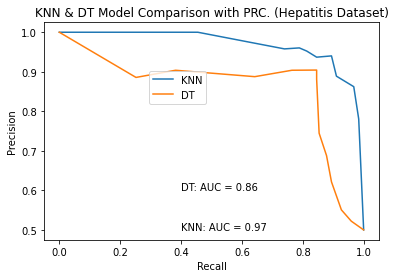

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score


#Compare the accuracy of the models by calcualting prc with dataset 1

#run knn cross validation for df1
knn_model_df1 = KNN(K=10)
dt_model_df1 = DecisionTree(max_depth = 6)
performances_df1 = {}

#conversions to numpy for df1
X1_afs_new = X1_afs.to_numpy()
Y1s_new = Y1s.to_numpy()

#run roc calculations for knn model
labels_1, prediction_scores_1 = cross_validate(knn_model_df1, X1_afs_new, Y1s_new)
fpr_1, tpr_1, _ = roc_curve(labels_1, prediction_scores_1)
auroc_1 = roc_auc_score(labels_1, prediction_scores_1)
precision_1, recall_1, thresholds_1 = precision_recall_curve(labels_1,prediction_scores_1)
auprc_1 = auc(recall_1,precision_1)
performances_df1['knn'] = {'fpr': fpr_1, 'tpr':tpr_1, 'auroc': auroc_1,
                            "precision":precision_1, "recall": recall_1,
                            "auprc":auprc_1 }

#run roc calculations for dt model
labels_2, prediction_scores_2 = cross_validate(dt_model_df1, X1_afs_new, Y1s_new)
fpr_2, tpr_2, _ = roc_curve(labels_2, prediction_scores_2)
auroc_2 = roc_auc_score(labels_2, prediction_scores_2)
precision_2, recall_2, thresholds_2 = precision_recall_curve(labels_2,prediction_scores_2)
auprc_2 = auc(recall_2,precision_2)

performances_df1['dt'] = {'fpr': fpr_2, 'tpr':tpr_2, 'auroc': auroc_2,
                          "precision":precision_2, "recall": recall_2,
                            "auprc":auprc_2 }

# fig1 = plt.figure()
plt.clf()
plt.plot(performances_df1['knn']['recall'], performances_df1['knn']['precision'],label='KNN')
plt.text(0.4, 0.5, 'KNN' + ': AUC = '+ str(round(performances_df1['knn']['auprc'],2)))

plt.plot(performances_df1['dt']['recall'], performances_df1['dt']['precision'],label='DT')
plt.text(0.4, 0.6, 'DT' + ': AUC = '+ str(round(performances_df1['dt']['auprc'],2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(0.5, 0.8))
plt.title('KNN & DT Model Comparison with PRC. (Hepatitis Dataset)')
plt.savefig('PRC_df1.png', bbox_inches='tight', dpi=300)


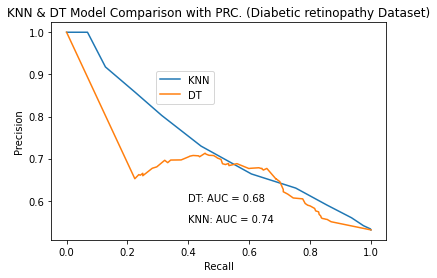

In [ ]:
# run knn cross validation for df2
knn_model_df2 = KNN(K=11)
dt_model_df2 = DecisionTree(max_depth = 13)
performances_df2 = {}

# conversions to numpy for df2
X2_std_new = X2_std.to_numpy()


# run roc & prc calculations for knn model
labels_3, prediction_scores_3 = cross_validate(knn_model_df2, X2_std_new, Y2)
fpr_3, tpr_3, _ = roc_curve(labels_3, prediction_scores_3)
auroc_3 = roc_auc_score(labels_3, prediction_scores_3)
precision_3, recall_3, thresholds_3 = precision_recall_curve(labels_3,prediction_scores_3)
auprc_3 = auc(recall_3,precision_3)
performances_df2['knn'] = {'fpr': fpr_3, 'tpr':tpr_3, 'auroc': auroc_3,
                            "precision":precision_3, "recall": recall_3,
                            "auprc":auprc_3}

# run roc & prc calculations for dt model
labels_4, prediction_scores_4 = cross_validate(dt_model_df2, X2_std_new, Y2)
fpr_4, tpr_4, _ = roc_curve(labels_4, prediction_scores_4)
auroc_4 = roc_auc_score(labels_4, prediction_scores_4)
precision_4, recall_4, thresholds_4 = precision_recall_curve(labels_4,prediction_scores_4)
auprc_4 = auc(recall_4,precision_4)

performances_df2['dt'] = {'fpr': fpr_4, 'tpr':tpr_4, 'auroc': auroc_4,
                          "precision":precision_4, "recall": recall_4,
                            "auprc":auprc_4 }

# fig1 = plt.figure()
plt.clf()
plt.plot(performances_df2['knn']['recall'], performances_df2['knn']['precision'],label='KNN')
plt.text(0.4, 0.55, 'KNN' + ': AUC = '+ str(round(performances_df2['knn']['auprc'],2)))

plt.plot(performances_df2['dt']['recall'], performances_df2['dt']['precision'],label='DT')
plt.text(0.4, 0.6, 'DT' + ': AUC = '+ str(round(performances_df2['dt']['auprc'],2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(0.5, 0.8))
plt.title('KNN & DT Model Comparison with PRC. (Diabetic retinopathy Dataset)')

plt.savefig('PRC_df2.png', bbox_inches='tight', dpi=300)

#Try different K values for KNN with DF1

In [ ]:
#Make sure X1_train,Y1_train,X1_test, Y1_test are ndarrays

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_afs, Y1s, test_size = 0.3, random_state=1, shuffle=True)
X1_train, X1_valid, Y1_train, Y1_valid = train_test_split(X1_train, Y1_train, test_size = 0.3, random_state=1, shuffle=True)

n_valid = Y1_valid.shape[0]

model_choices1=[]
valid_acc1 = []
train_acc1 = []

if type(X1_train) is not np.ndarray:
  X1_train = X1_train.to_numpy()
if type(X1_test) is not np.ndarray:
  X1_test = X1_test.to_numpy()
if type(X1_valid) is not np.ndarray:
  X1_valid = X1_valid.to_numpy()
if type(Y1_test) is not np.ndarray:
  Y1_test = Y1_test.to_numpy()
if type(Y1_train) is not np.ndarray:
  Y1_train = Y1_train.to_numpy()
if type(Y1_valid) is not np.ndarray:
  Y1_valid = Y1_valid.to_numpy()

for k in range(1,15):
    knn = KNN(K=k) # create a KNN object (OOP)
    knn = knn.fit(X1_train, Y1_train)
    y_prob, knns, Y1_valid_pred = knn.predict(X1_valid)
    accuracy = knn.evaluate_acc(Y1_valid_pred,Y1_valid)

    #Gain accuracies for train data points

    _,_, Y1_train_pred = knn.predict(X1_train)
    accuracy_train = knn.evaluate_acc(Y1_train_pred,Y1_train)
    model_choices1.append(k)
    valid_acc1.append(accuracy)
    train_acc1.append(accuracy_train)

#use the best K to predict test data
valid_acc1 = np.array(valid_acc1)
train_acc1 = np.array(train_acc1)
best_valid_K = model_choices1[valid_acc1.argmax()]
knn = KNN(K=best_valid_K)
knn.fit(X1_train, Y1_train)
y_prob, knns ,Y1_test_pred = knn.predict(X1_test)
test_accuracy1 = knn.evaluate_acc(Y1_test_pred,Y1_test)
print(f"Test accuracy using best K value {best_valid_K} is {test_accuracy1}")

plt.clf()
plt.plot(model_choices1, train_acc1, marker='d', color='black', label='training')
plt.plot(model_choices1, valid_acc1, marker='o', color='blue', label='validation')
plt.plot(best_valid_K, test_accuracy1, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

# plt.show()
plt.savefig("training_validation_testing.png",bbox_inches='tight', dpi=300)



In [ ]:
# perf = evaluate()
# plot_roc(perf)
# plot_prc(perf)
# plot_prc(perf)

**Task 3: #2**

#Try different K values for KNN with DF2

In [ ]:
#Use validation set to look at K from 1 to 15 for DF2

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_std, Y2, test_size = 0.3, random_state=1, shuffle=True)
X2_train, X2_valid, Y2_train, Y2_valid = train_test_split(X2_train, Y2_train, test_size = 0.3, random_state=1, shuffle=True)

n_valid = Y1_valid.shape[0]

model_choices2=[]
valid_acc2 = []
train_acc2 = []

if type(X2_train) is not np.ndarray:
  X2_train = X2_train.to_numpy()
if type(X2_test) is not np.ndarray:
  X2_test = X2_test.to_numpy()
if type(X2_valid) is not np.ndarray:
  X2_valid = X2_valid.to_numpy()

n_valid = Y2_valid.shape[0]

for k in range(1,15):
    knn = KNN(K=k) # create a KNN object (OOP)
    knn.fit(X2_train, Y2_train)
    knn.predict(X2_valid)
    y_prob, knns, Y2_valid_pred = knn.predict(X2_valid)
    #accuracy = np.sum(Y1_valid_pred == Y1_valid)/n_valid
    accuracy = knn.evaluate_acc(Y2_valid_pred,Y2_valid)

    _,_, Y2_train_pred = knn.predict(X2_train)
    accuracy_train = knn.evaluate_acc(Y2_train_pred,Y2_train)
    model_choices2.append(k)
    valid_acc2.append(accuracy)
    train_acc2.append(accuracy_train)


# use the best K to predict test data
valid_acc2 = np.array(valid_acc2)
train_acc2 = np.array(train_acc2)
best_valid_K2 = model_choices1[valid_acc2.argmax()]
knn2bestK = KNN(K=best_valid_K2)
knn2bestK.fit(X2_train, Y2_train)
y_prob2, knns2 ,Y2_test_pred = knn2bestK.predict(X2_test)
test_accuracy2 = knn2bestK.evaluate_acc(Y2_test_pred,Y2_test)
print(f"Test accuracy using best K value {best_valid_K2} is {test_accuracy2}")

plt.clf()
plt.plot(model_choices2, train_acc2, marker='d', color='black', label='training')
plt.plot(model_choices2, valid_acc2, marker='o', color='blue', label='validation')
plt.plot(best_valid_K2, test_accuracy2, marker='*', color='red', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')

# plt.show()
plt.savefig("training_validation_testing.png",bbox_inches='tight', dpi=300)

**Task 3: #3**

#Try different tree depths with DT with DF1






In [ ]:
#Use validation set to look at different Tree depths for DF1
model_choices1=[]
train_acc1 = []
valid_acc1 = []


X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_afs, Y1s, test_size = 0.3, random_state=1, shuffle=True)
X1_train, X1_valid, Y1_train, Y1_valid = train_test_split(X1_train, Y1_train, test_size = 0.3, random_state=1, shuffle=True)

n_train1 = Y1_train.shape[0]
n_valid1 = Y1_valid.shape[0]

X1_train = X1_train.to_numpy()
Y1_train = Y1_train.to_numpy()
X1_test = X1_test.to_numpy()
Y1_test = Y1_test.to_numpy()
X1_valid = X1_valid.to_numpy()
Y1_valid = Y1_valid.to_numpy()

for k in range(1, 20):
    dt = DecisionTree(max_depth=k) # create a KNN object (OOP)

    Y1_train_prob,Y1_train_pred = dt.fit(X1_train, Y1_train).predict(X1_train)
    acc_tr1 = dt.evaluate_acc(Y1_train_pred, Y1_train)

    Y1_valid_prob, Y1_valid_pred = dt.fit(X1_train, Y1_train).predict(X1_valid)
    acc_val1 = dt.evaluate_acc(Y1_valid_pred, Y1_valid)

    model_choices1.append(k)
    train_acc1.append(acc_tr1)
    valid_acc1.append(acc_val1)

# use the best K to predict test data
valid_acc1 = np.array(valid_acc1)
best_depth1 = model_choices1[valid_acc1.argmax()]
dt = DecisionTree(max_depth=4)
Y1_test_prob, Y1_test_pred = dt.fit(X1_train, Y1_train).predict(X1_test)
test_accuracy1 = dt.evaluate_acc(Y1_test_pred, Y1_test)
print(f'best depth = {best_depth1}, test accuracy = {test_accuracy1}')

plt.plot(model_choices1, train_acc1, marker='d', color='black', label='training')
plt.plot(model_choices1, valid_acc1, marker='o', color='blue', label='validation')
plt.plot(best_depth1, test_accuracy1, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('iris_DT_chooseDepth.png',dpi=300,bbox_inches='tight')




#Try different tree depths for DT with DF2

In [ ]:
#Use validation set to look at different Tree depths for DF2
model_choices2=[]
train_acc2 = []
valid_acc2 = []

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_std, Y2, test_size = 0.3, random_state=1, shuffle=True)
X2_train, X2_valid, Y2_train, Y2_valid = train_test_split(X2_train, Y2_train, test_size = 0.3, random_state=1, shuffle=True)

n_train2 = Y2_train.shape[0]
n_valid2 = Y2_valid.shape[0]

X2_train = X2_train.to_numpy()
X2_test = X2_test.to_numpy()
X2_valid = X2_valid.to_numpy()

for k in range(1, 20):
    dt = DecisionTree(max_depth=k) # create a KNN object (OOP)

    Y2_train_prob,Y2_train_pred = dt.fit(X2_train, Y2_train).predict(X2_train)
    acc_tr2 = dt.evaluate_acc(Y2_train_pred, Y2_train)

    Y2_valid_prob, Y2_valid_pred = dt.fit(X2_train, Y2_train).predict(X2_valid)
    acc_val2 = dt.evaluate_acc(Y2_valid_pred, Y2_valid)

    model_choices2.append(k)
    train_acc2.append(acc_tr2)
    valid_acc2.append(acc_val2)

# use the best K to predict test data
valid_acc2 = np.array(valid_acc2)
best_depth2 = model_choices2[valid_acc2.argmax()]
dt = DecisionTree(max_depth=best_depth2)
Y2_test_prob, Y2_test_pred = dt.fit(X2_train, Y2_train).predict(X2_test)
test_accuracy2 = dt.evaluate_acc(Y2_test_pred, Y2_test)
print(f'best depth = {best_depth2}, test accuracy = {test_accuracy2}')

plt.plot(model_choices2, train_acc2, marker='d', color='black', label='training')
plt.plot(model_choices2, valid_acc2, marker='o', color='blue', label='validation')
plt.plot(best_depth2, test_accuracy2, marker='*', color='red', label='testing')
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('iris_DT_chooseDepth.png',dpi=300,bbox_inches='tight')

**Task 3: #4**

#Try out different distance/cost functions for both models

We need plots of ROC and PRC etc... of these all on one plot

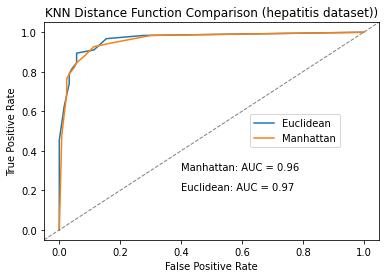

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics.pairwise import cosine_distances


#COMPARE Distance functions for KNN on DF1
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
cosinesimilarity = lambda x1, x2: np.divide(np.sum(x1*x2), (np.sqrt(x1**2)*np.sqrt(x2**2)))


# Run KNN Models on df1 with best k-value = 10, df1 is X1_afs, and Y1s

dist_functions = [euclidean, manhattan]
myK = 10
performances_cost_df1 = {}

#split the data set for accuracy calculation
X_train, X_test, Y_train, Y_test = train_test_split(X1_afs, Y1s, test_size = 0.2, random_state=1, shuffle=True)


#conversions to numpy for df1
X1_afs_new = X1_afs.to_numpy()
Y1s_new = Y1s.to_numpy()

#euclidean
knn_eu = KNN(K=myK,dist_fn= euclidean)
labels_eu, prediction_scores_eu = cross_validate(knn_eu, X1_afs_new, Y1s_new)
fpr_eu, tpr_eu, _ = roc_curve(labels_eu, prediction_scores_eu)
auc_eu = roc_auc_score(labels_eu, prediction_scores_eu)
performances_cost_df1['knn-eu'] = {'fpr': fpr_eu, 'tpr':tpr_eu, 'auc': auc_eu}


#euclidean accuracy without cross validation
# knn_eu.fit(X_train, Y_train)
# y_prob, knns , Y_predicted = knn_eu.predict(X_test)
# accuracy_eu = knn_eu.evaluate_acc(Y_predicted,Y_test)
# print(f'accuracy is {accuracy_eu:.3f}.')


#manhattan
knn_man = KNN(K=myK,dist_fn= manhattan)
labels_man, prediction_scores_man = cross_validate(knn_man, X1_afs_new, Y1s_new)
fpr_man, tpr_man, _ = roc_curve(labels_man, prediction_scores_man)
auc_man = roc_auc_score(labels_man, prediction_scores_man)
performances_cost_df1['knn-man'] = {'fpr': fpr_man, 'tpr':tpr_man, 'auc': auc_man}

#manhattan accuracy without cross validation
# knn_man.fit(X_train, Y_train)
# y_prob, knns , Y_predicted = knn_man.predict(X_test)
# accuracy_man = model.evaluate_acc(Y_predicted,Y_test)
# print(f'accuracy is {accuracy_man:.3f}.')



#plot them all in the roc graph

fig = plt.figure()
plt.plot(performances_cost_df1['knn-eu']['fpr'], performances_cost_df1['knn-eu']['tpr'], label="Euclidean")
plt.text(0.4, 0.2, "Euclidean" + ': AUC = '+str(round(performances_cost_df1['knn-eu']['auc'],2)))

plt.plot(performances_cost_df1['knn-man']['fpr'], performances_cost_df1['knn-man']['tpr'], label="Manhattan")
plt.text(0.4, 0.3, "Manhattan" + ': AUC = '+str(round(performances_cost_df1['knn-man']['auc'],2)))


plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('KNN Distance Function Comparison (hepatitis dataset))')
plt.savefig('cost-fn-knn-df1.png', bbox_inches='tight', dpi=300)

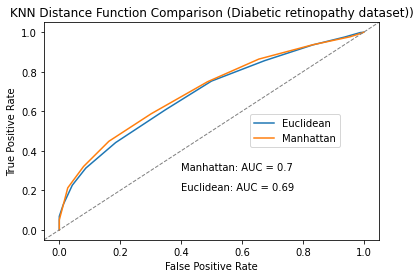

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics.pairwise import cosine_distances


#COMPARE Distance functions for KNN on DF2

# Run KNN Models on df2 with best k-value = 11, df1 is X1_afs, and Y1s

dist_functions = [euclidean, manhattan]
myK = 11
performances_cost_df2 = {}

#split the data set for accuracy calculation
X_train, X_test, Y_train, Y_test = train_test_split(X1_afs, Y1s, test_size = 0.2, random_state=1, shuffle=True)


#conversions to numpy for df2
X2_std_new = X2_std.to_numpy()


#euclidean
knn_eu_2 = KNN(K=myK,dist_fn= euclidean)
labels_eu_2, prediction_scores_eu_2 = cross_validate(knn_eu_2, X2_std_new, Y2)
fpr_eu_2, tpr_eu_2, _ = roc_curve(labels_eu_2, prediction_scores_eu_2)
auc_eu_2 = roc_auc_score(labels_eu_2, prediction_scores_eu_2)
performances_cost_df2['knn-eu-2'] = {'fpr': fpr_eu_2, 'tpr':tpr_eu_2, 'auc': auc_eu_2}


#euclidean accuracy without cross validation
# knn_eu.fit(X_train, Y_train)
# y_prob, knns , Y_predicted = knn_eu.predict(X_test)
# accuracy_eu = knn_eu.evaluate_acc(Y_predicted,Y_test)
# print(f'accuracy is {accuracy_eu:.3f}.')


#manhattan
knn_man_2 = KNN(K=myK,dist_fn= manhattan)
labels_man_2, prediction_scores_man_2 = cross_validate(knn_man_2, X2_std_new, Y2)
fpr_man_2, tpr_man_2, _ = roc_curve(labels_man_2, prediction_scores_man_2)
auc_man_2 = roc_auc_score(labels_man_2, prediction_scores_man_2)
performances_cost_df2['knn-man-2'] = {'fpr': fpr_man_2, 'tpr':tpr_man_2, 'auc': auc_man_2}

#manhattan accuracy without cross validation
# knn_man.fit(X_train, Y_train)
# y_prob, knns , Y_predicted = knn_man.predict(X_test)
# accuracy_man = model.evaluate_acc(Y_predicted,Y_test)
# print(f'accuracy is {accuracy_man:.3f}.')



#plot them all in the roc graph

fig = plt.figure()
plt.plot(performances_cost_df2['knn-eu-2']['fpr'], performances_cost_df2['knn-eu-2']['tpr'], label="Euclidean")
plt.text(0.4, 0.2, "Euclidean" + ': AUC = '+str(round(performances_cost_df2['knn-eu-2']['auc'],2)))

plt.plot(performances_cost_df2['knn-man-2']['fpr'], performances_cost_df2['knn-man-2']['tpr'], label="Manhattan")
plt.text(0.4, 0.3, "Manhattan" + ': AUC = '+str(round(performances_cost_df2['knn-man-2']['auc'],2)))


plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('KNN Distance Function Comparison (Diabetic retinopathy dataset))')
plt.savefig('cost-fn-knn-df2.png', bbox_inches='tight', dpi=300)

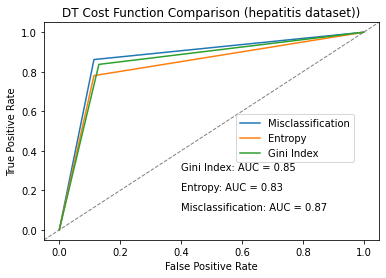

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics.pairwise import cosine_distances

#COMPARE Distance functions for DT on DF1

# Run KNN Models on df1 with best depth value  = 6, df1 is X1_afs, and Y1s

myK = 6
performances_cost_dt_df1 = {}

#split the data set for accuracy calculation
X_train, X_test, Y_train, Y_test = train_test_split(X1_afs, Y1s, test_size = 0.2, random_state=1, shuffle=True)


#conversions to numpy for df1
X1_afs_new = X1_afs.to_numpy()
Y1s_new = Y1s.to_numpy()


#cost_misclassification
dt_mis = DecisionTree(cost_fn = cost_misclassification)
labels_mis, prediction_scores_mis = cross_validate(dt_mis, X1_afs_new, Y1s_new)
fpr_mis, tpr_mis, _ = roc_curve(labels_mis, prediction_scores_mis)
auc_mis = roc_auc_score(labels_mis, prediction_scores_mis)
performances_cost_dt_df1['dt-mis'] = {'fpr': fpr_mis, 'tpr':tpr_mis, 'auc': auc_mis}

#cost_entropy
dt_ent = DecisionTree(cost_fn = cost_entropy)
labels_ent, prediction_scores_ent = cross_validate(dt_ent, X1_afs_new, Y1s_new)
fpr_ent, tpr_ent, _ = roc_curve(labels_ent, prediction_scores_ent)
auc_ent = roc_auc_score(labels_ent, prediction_scores_ent)
performances_cost_dt_df1['dt-ent'] = {'fpr': fpr_ent, 'tpr':tpr_ent, 'auc': auc_ent}


#cost_gini_index
dt_gini = DecisionTree(cost_fn = cost_gini_index)
labels_gini, prediction_scores_gini = cross_validate(dt_gini, X1_afs_new, Y1s_new)
fpr_gini, tpr_gini, _ = roc_curve(labels_gini, prediction_scores_gini)
auc_gini = roc_auc_score(labels_gini, prediction_scores_gini)
performances_cost_dt_df1['dt-gini'] = {'fpr': fpr_gini, 'tpr':tpr_gini, 'auc': auc_gini}




#plot them all in the roc graph

fig = plt.figure()
plt.plot(performances_cost_dt_df1['dt-mis']['fpr'], performances_cost_dt_df1['dt-mis']['tpr'], label="Misclassification")
plt.text(0.4, 0.1, "Misclassification" + ': AUC = '+str(round(performances_cost_dt_df1['dt-mis']['auc'],2)))

plt.plot(performances_cost_dt_df1['dt-ent']['fpr'], performances_cost_dt_df1['dt-ent']['tpr'], label="Entropy")
plt.text(0.4, 0.2, "Entropy" + ': AUC = '+str(round(performances_cost_dt_df1['dt-ent']['auc'],2)))

plt.plot(performances_cost_dt_df1['dt-gini']['fpr'], performances_cost_dt_df1['dt-gini']['tpr'], label="Gini Index")
plt.text(0.4, 0.3, "Gini Index" + ': AUC = '+str(round(performances_cost_dt_df1['dt-gini']['auc'],2)))


plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('DT Cost Function Comparison (hepatitis dataset))')
plt.savefig('cost-fn-dt-df1.png', bbox_inches='tight', dpi=300)

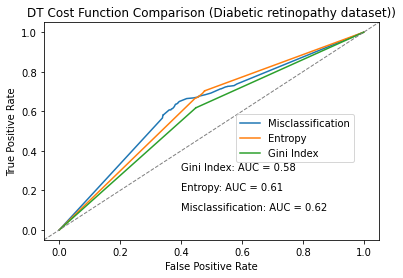

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics.pairwise import cosine_distances

#COMPARE Distance functions for DT on DF2

# Run KNN Models on df1 with best depth value  = 13, df1 is X1_afs, and Y1s

myK = 13
performances_cost_dt_df2 = {}

#split the data set for accuracy calculation
X_train, X_test, Y_train, Y_test = train_test_split(X1_afs, Y1s, test_size = 0.2, random_state=1, shuffle=True)


#conversions to numpy for df1
X2_std_new = X2_std.to_numpy()


#cost_misclassification
dt_mis_2 = DecisionTree(cost_fn = cost_misclassification)
labels_mis_2, prediction_scores_mis_2 = cross_validate(dt_mis_2, X2_std_new, Y2)
fpr_mis_2, tpr_mis_2, _ = roc_curve(labels_mis_2, prediction_scores_mis_2)
auc_mis_2 = roc_auc_score(labels_mis_2, prediction_scores_mis_2)
performances_cost_dt_df2['dt-mis-2'] = {'fpr': fpr_mis_2, 'tpr':tpr_mis_2, 'auc': auc_mis_2}

#cost_entropy
dt_ent_2 = DecisionTree(cost_fn = cost_entropy)
labels_ent_2, prediction_scores_ent_2 = cross_validate(dt_ent_2, X2_std_new, Y2)
fpr_ent_2, tpr_ent_2, _ = roc_curve(labels_ent_2, prediction_scores_ent_2)
auc_ent_2 = roc_auc_score(labels_ent_2, prediction_scores_ent_2)
performances_cost_dt_df2['dt-ent-2'] = {'fpr': fpr_ent_2, 'tpr':tpr_ent_2, 'auc': auc_ent_2}


#cost_gini_index
dt_gini_2 = DecisionTree(cost_fn = cost_gini_index)
labels_gini_2, prediction_scores_gini_2 = cross_validate(dt_gini_2, X2_std_new, Y2)
fpr_gini_2, tpr_gini_2, _ = roc_curve(labels_gini_2, prediction_scores_gini_2)
auc_gini_2 = roc_auc_score(labels_gini_2, prediction_scores_gini_2)
performances_cost_dt_df2['dt-gini-2'] = {'fpr': fpr_gini_2, 'tpr':tpr_gini_2, 'auc': auc_gini_2}



#plot them all in the roc graph

fig = plt.figure()
plt.plot(performances_cost_dt_df2['dt-mis-2']['fpr'], performances_cost_dt_df2['dt-mis-2']['tpr'], label="Misclassification")
plt.text(0.4, 0.1, "Misclassification" + ': AUC = '+str(round(performances_cost_dt_df2['dt-mis-2']['auc'],2)))

plt.plot(performances_cost_dt_df2['dt-ent-2']['fpr'], performances_cost_dt_df2['dt-ent-2']['tpr'], label="Entropy")
plt.text(0.4, 0.2, "Entropy" + ': AUC = '+str(round(performances_cost_dt_df2['dt-ent-2']['auc'],2)))

plt.plot(performances_cost_dt_df2['dt-gini-2']['fpr'], performances_cost_dt_df2['dt-gini-2']['tpr'], label="Gini Index")
plt.text(0.4, 0.3, "Gini Index" + ': AUC = '+str(round(performances_cost_dt_df2['dt-gini-2']['auc'],2)))


plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.legend(loc='upper center', bbox_to_anchor=(0.75, 0.6))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('DT Cost Function Comparison (Diabetic retinopathy dataset))')
plt.savefig('cost-fn-dt-df2.png', bbox_inches='tight', dpi=300)

**Task 3: #5**

#Present two plots of the decision boundaries one for KNN and one for DT

Decision Tree Decision Boundary for DF1

In [ ]:
X1_afs

KNN Decision Boundary

In [ ]:
from sklearn.model_selection import train_test_split

X1_afs
Y1s


# X1_afs = X1_afs.to_numpy()
# Y1s = Y1s.to_numpy()

X1_BiliAlb = X1_afs[:,[13,16]]

#13,16 = Bilirubin, Albumin
#15, 16 = SGOT, Albumin



Y1s = np.reshape(Y1s, (246))


(num_instances, num_features), num_classes = X1_afs.shape, 2

x_train, x_test, y_train, y_test = train_test_split(X1_BiliAlb, Y1s, test_size = 0.2, random_state=1, shuffle=True)



myK = 5
model = KNN(K=myK)


y_prob, knns, y_pred = model.fit(x_train, y_train).predict(x_test)


#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(X1_BiliAlb[:,0]), np.max(X1_BiliAlb[:,0]), 200)
x1v = np.linspace(np.min(X1_BiliAlb[:,1]), np.max(X1_BiliAlb[:,1]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [5]:
    print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_train.shape[0], 2))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1      #(196,2) array with 0,1 for classes for training data


    y_prob, knns, y_pred = model.fit(x_train, y_train).predict(x_test)      #y_prob is (50,2) array where 0 column gives probability of class 0
    y_pred = np.argmax(y_prob,axis=-1)
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)

    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)


    #to get class probability of all the points in the 2D grid
    y_prob_all, _ , _ = model.fit(x_train, y_train).predict(x_all)        #y_prob_all gives a (40000,2) array with class probabilities in each column
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    #y_pred_all gives (40000,2) of 0,1 for prediction of live or die


color = []
for i in range(y_train_prob.shape[0]):    #create a for loop that goes through y_train_prob and for each value assigns colors [0,1] = red, [1,0] = blue
    if (y_train_prob[i,0] == 1): color.append("blue")
    else: color.append("red")


colors = []
for i in range(y_pred_all.shape[0]):    #create a for loop that goes through y_pred_all and for each value assigns colors [0,1] = red, [1,0] = blue
    if (y_pred_all[i,0] == 1): colors.append("blue")
    else: colors.append("red")


plt.clf()
plt.scatter(x_train[:,0], x_train[:,1], c=color, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=colors, marker='.', alpha=0.01)

plt.ylabel('Albumin')
plt.xlabel('Bilirubin')
plt.savefig('decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')


Decision Tree Decision Boundary

In [ ]:
from sklearn.model_selection import train_test_split

X1_afs
Y1s

# X1_afs = X1_afs.to_numpy()
# Y1s = Y1s.to_numpy()

X1_BiliAlb = X1_afs[:,[13,16]]
Y1s = np.reshape(Y1s, (246))


(num_instances, num_features), num_classes = X1_afs.shape, 2
x_train, x_test, y_train, y_test = train_test_split(X1_BiliAlb, Y1s, test_size = 0.2, random_state=1, shuffle=True)


tree = DecisionTree(max_depth = 5)
probs1_test, _ = tree.fit(x_train, y_train).predict(x_test)      #probs1_test is a (50,2) array of 0,1 for prediction and survival for testing data - (predictions for testing data)

y1_pred = np.argmax(probs1_test,1)      #Go along the columns and return index with max value --> (50,) array of actual predictions generated from probs1_test
accuracy = np.sum(y1_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')


#Plot the points of the training data into predicted classes
y_train_prob = np.zeros((y_train.shape[0], num_classes))       #Create (196, 2)
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1        #makes (196,2) for predicted classes for each point in y_train, return 1, 0 for each column


#Generate the points of Bilirubin and Albumin features to be plotted
x0v = np.linspace(np.min(X1_BiliAlb[:,0]), np.max(X1_BiliAlb[:,0]), 200)
x1v = np.linspace(np.min(X1_BiliAlb[:,1]), np.max(X1_BiliAlb[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

y_prob_all, _ = tree.fit(x_train, y_train).predict(x_all)


colorsss = []
for i in range(y_train_prob.shape[0]):    #create a for loop that goes through y_train_prob and for each value assigns colors [0,1] = red, [1,0] = blue
    if (y_train_prob[i,0] == 1): colorsss.append("blue")
    else: colorsss.append("red")

colorssss = []
for i in range(y_prob_all.shape[0]):
    if (y_prob_all[i,0] > .5): colorssss.append("blue")
    else: colorssss.append("red")

plt.scatter(x_train[:,0], x_train[:,1], c=colorsss, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=colorssss, marker='.', alpha=.01)

plt.ylabel('Albumin')
plt.xlabel('Bilirubin')
plt.title('Depth = ' + str(tree_depth))
plt.savefig('Decision Tree Boundary' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

**KNN Decision Boundary for DF2**

In [ ]:
from sklearn.model_selection import train_test_split

X2_std
Y2


# X2_std = X2_std.to_numpy()
# Y2 = Y2.to_numpy()

X2_MA_5_Exudate1 = X2_std[:,[2,17]]
Y2 = np.reshape(Y2, (1151))


(num_instances, num_features), num_classes = X2_MA_5_Exudate1.shape, 2

x_train, x_test, y_train, y_test = train_test_split(X2_MA_5_Exudate1, Y2, test_size = 0.2, random_state=1, shuffle=True)



myK = 5
model = KNN(K=myK)


y_prob, knns, y_pred = model.fit(x_train, y_train).predict(x_test)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')



#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(X2_MA_5_Exudate1[:,0]), np.max(X2_MA_5_Exudate1[:,0]), 200)
x1v = np.linspace(np.min(X2_MA_5_Exudate1[:,1]), np.max(X2_MA_5_Exudate1[:,1]), 200)

# print(np.min(x[:,0]))
# print(np.max(x[:,0]))
# print(np.min(x[:,1]))
# print(np.max(x[:,1]))

# to features values as a mesh
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in [5]:
    print(k)
    model = KNN(K=k)

    y_train_prob = np.zeros((y_train.shape[0], 2))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1      #(196,2) array with 0,1 for classes for training data


    y_prob, knns, y_pred = model.fit(x_train, y_train).predict(x_test)      #y_prob is (50,2) array where 0 column gives probability of class 0
    y_pred = np.argmax(y_prob,axis=-1)
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)

    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    acc = f'accuracy: {accuracy*100:.1f}.'
    print(acc)


    #to get class probability of all the points in the 2D grid
    y_prob_all, _ , _ = model.fit(x_train, y_train).predict(x_all)        #y_prob_all gives a (40000,2) array with class probabilities in each column
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1    #y_pred_all gives (40000,2) of 0,1 for prediction of live or die


color = []
for i in range(y_train_prob.shape[0]):    #create a for loop that goes through y_train_prob and for each value assigns colors [0,1] = red, [1,0] = blue
    if (y_train_prob[i,0] == 1): color.append("blue")
    else: color.append("red")


colors = []
for i in range(y_pred_all.shape[0]):    #create a for loop that goes through y_pred_all and for each value assigns colors [0,1] = red, [1,0] = blue
    if (y_pred_all[i,0] == 1): colors.append("blue")
    else: colors.append("red")


plt.clf()
plt.scatter(x_train[:,0], x_train[:,1], c=color, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=colors, marker='.', alpha=0.01)

plt.ylabel('Exudate 1')
plt.xlabel('MA at .05 ')
plt.savefig('decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')


**Decision Tree Decision Boundary for DF2**

In [ ]:
from sklearn.model_selection import train_test_split

X2_std
Y2


#X2_std = X2_std.to_numpy()
#Y2 = Y2.to_numpy()

X2_MA_5_Exudate1 = X2_std[:,[2,17]]
Y2 = np.reshape(Y2, (1151))


(num_instances, num_features), num_classes = X2_MA_5_Exudate1.shape, 2

x_train, x_test, y_train, y_test = train_test_split(X2_MA_5_Exudate1, Y2, test_size = 0.2, random_state=1, shuffle=True)


tree = DecisionTree(max_depth = 2)
probs1_test, _ = tree.fit(x_train, y_train).predict(x_test)      #probs1_test is a (50,2) array of 0,1 for prediction and survival for testing data - (predictions for testing data)

y1_pred = np.argmax(probs1_test,1)      #Go along the columns and return index with max value --> (50,) array of actual predictions generated from probs1_test
accuracy = np.sum(y1_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')


#Plot the points of the training data into predicted classes
y_train_prob = np.zeros((y_train.shape[0], num_classes))       #Create (196, 2)
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1        #makes (196,2) for predicted classes for each point in y_train, return 1, 0 for each column


#Generate the points of Bilirubin and Albumin features to be plotted
x0v = np.linspace(np.min(X2_MA_5_Exudate1[:,0]), np.max(X2_MA_5_Exudate1[:,0]), 200)
x1v = np.linspace(np.min(X2_MA_5_Exudate1[:,1]), np.max(X2_MA_5_Exudate1[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

y_prob_all, _ = tree.fit(x_train, y_train).predict(x_all)


colorsss = []
for i in range(y_train_prob.shape[0]):    #create a for loop that goes through y_train_prob and for each value assigns colors [0,1] = red, [1,0] = blue
    if (y_train_prob[i,0] == 1): colorsss.append("blue")
    else: colorsss.append("red")

colorssss = []
for i in range(y_prob_all.shape[0]):
    if (y_prob_all[i,0] > .5): colorssss.append("blue")
    else: colorssss.append("red")

plt.scatter(x_train[:,0], x_train[:,1], c=colorsss, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=colorssss, marker='.', alpha=.01)

plt.ylabel('Exudate 1')
plt.xlabel('MA at .05')
plt.title('Depth = ' + str(tree_depth))
plt.savefig('Decision Tree Boundary' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

#Edited KNN

Since we observed that the diabetic retinopathy dataset appeared messy and had low accuracy on KNN we decided to implement and run a undersampling technique called edited nearest neighbors in order to clean the database by removing samples that are dissimilar to the their nearest neighbors. Edited KNN works as follows:

Rules:

1.) For each point in the dataset, look at the K = 3 nearest neighbors

2.) Determine the majority class of the 3 nearest neighbors

3.) If the point's class differs from the majority class of its 3 nearest neighbors, remove the point.

4.) Return the new smaller dataset


We then compared the accuracy of KNN on the new dataset vs. the original dataset and plotted ROC and PRC curves.

In [ ]:
from scipy.linalg.decomp import empty
from re import A

from sklearn.metrics import roc_curve, roc_auc_score
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

dataset = X2_std

class KNN:

    def __init__(self, K=3, dist_fn= euclidean, dataset= dataset):
        self.dist_fn = dist_fn
        self.K = K
        self.dataset = dataset
        return


    def fit(self, X, y):
        ''' Store the training data using this method as it is a lazy learner'''  #all the training that KNN does is remember the data
        self.X = X
        self.y = y
        self.C = 2  #number of classes of output y
        return self


    def predict(self, X_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''  #using stored data, makes prediction from x_test
        num_test = X_test.shape[0]    #number of rows or observations for testing data, the number of testing samples

        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = np.zeros((num_test,self.X.shape[0]))
        for i in range (num_test):
          for j in range (self.X.shape[0]):
            distances[i][j] = self.dist_fn(X_test[i],self.X[j])

        #Create knn, ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)

        #Create array for predicted Y_Predicted
        Y_Predicted = np.zeros((num_test))

        #Create y_prob, ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]

            #np bin count goes wrong here as survival ranges from 1-2, but bincount(arr) returns an array as large as the largest element+1 in arr
            #use np unique instead. Np unique returns an array with all the unique elements extracted from the array. Return_counts options return
            #the number of times each of the unique values comes up in the original array
            #values are the result y lables, while counts are the corresponding frequency of lables

            values, counts = np.unique(self.y[knns[i,:]], return_counts=True)
            # print('Corresponding survival status of knn')
            # print(self.y[knns[i,:]])
            for c in range(self.C):
              Classindex = np.where(values == c)[0]
              if (Classindex.shape[0] == 0):
                y_prob[i][c] = 0
              else:
                y_prob[i][c] = counts[Classindex[0]]/self.K

            mode_indice = np.argmax(counts)
            Y_Predicted[i] = values[mode_indice]
            # print('Survival probabilities')
            # print(y_prob[i,:])
            # print('Survival prediction')
            # print(Y_Predicted[i])

        return y_prob, knns, Y_Predicted


    def evaluate_acc(self, Y_predicted, Y_test):
        acc =  np.sum(Y_predicted == Y_test)/Y_test.shape[0]
        return acc




    #In order to run edited KNN, have to fit the KNN with the whole dataset first...
    def editwithKNN(self, K):
        self.dataset = dataset
        self.K = K


        #Calculate the distance between
        distances = np.zeros((X.shape[0],X.shape[0]))

        for i in range(X.shape[0]):
          for j in range(X.shape[0]):  #calculate the distance between each point
            distances[i][j] = self.dist_fn(X[i],X[j])       #This is a symmetric distance matrix of the points in dataset X

            #Create knn, ith-row of knns stores the indices of k closest training samples to the ith-test sample
            knns = np.zeros((X.shape[0], self.K), dtype=int)

            #Create array for predicted Y_Predicted
            Y_Predicted = np.zeros((X.shape[0]))

        #Create y_prob, ith-row of y_prob has the probability distribution over the 2 classes
        y_prob = np.zeros((X.shape[0], 2))

        for i in range(X.shape[0]):
            knns[i,:] = np.argsort(distances[i])[:self.K]

            #np bin count goes wrong here as survival ranges from 1-2, but bincount(arr) returns an array as large as the largest element+1 in arr
            #use np unique instead. Np unique returns an array with all the unique elements extracted from the array. Return_counts options return
            #the number of times each of the unique values comes up in the original array
            #values are the result y lables, while counts are the corresponding frequency of lables

            values, counts = np.unique(self.y[knns[i,:]], return_counts=True)
            # print('Corresponding survival status of knn')
            # print(self.y[knns[i,:]])
            for c in range(2):
              Classindex = np.where(values == c)[0]
              if (Classindex.shape[0] == 0):
                y_prob[i][c] = 0
              else:
                y_prob[i][c] = counts[Classindex[0]]/self.K

            mode_indice = np.argmax(counts)
            Y_Predicted[i] = values[mode_indice]

        remove_these_indices = []

        for i in range(X.shape[0]):
          if( y[i] != Y_Predicted[i] ):   #If the class label of the ith datapoint not equal to mode of class labels of K nearest neighbors (Y_predicted), remove the datapoint
            remove_these_indices.append(i)

        X2_editedKNN = np.delete(X, remove_these_indices, 0)
        Y2_editedKNN = np.delete(Y2, remove_these_indices, 0)

        print("This is X: ",X)
        print("This is X edited with kNN: ", X2_editedKNN)
        print("This is y: ",y)
        print("This is y edited with kNN: ", Y2_editedKNN)
        print("The shape of X:", y.shape)
        print("The shape of X2_editedkNN", Y2_editedKNN.shape)

        return X2_editedKNN, Y2_editedKNN

In [ ]:
X2_std.to_numpy()
# Y2.to_numpy()
X = X2_std
y = Y2

X = X.to_numpy()
y= Y2
myK = 3

model = KNN(K=myK)
model.fit(X,y)
model.editwithKNN(myK)

Run KNN on X2_std and X2_std_edited and compare accuracy by plotting ROC and PRC Curves

Compute Accuracies of KNN on X2_std vs. X2_edited

In [ ]:
from sklearn.model_selection import train_test_split
#Validate that knn is working for DF1
myK = 6
model = KNN(K=myK)

#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X2_std, Y2, test_size = 0.2, random_state=1, shuffle=True)
# Y_train = Y_train.to_numpy()
# Y_train = Y_train.Survival.astype(int).to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Y_test = Y_test.Survival.astype(int).to_numpy()
# Y_test = Y_test.to_numpy()
N_test_samples = X_test.shape[0]

model.fit(X_train, Y_train)
y_prob, knns , Y_predicted = model.predict(X_test)

#To get hard predictions by choosing the class with the maximum probability
accuracy = model.evaluate_acc(Y_predicted,Y_test)
print(f'accuracy is {accuracy:.3f}.')

In [ ]:
from sklearn.model_selection import train_test_split
#Validate that knn is working for DF1
myK = 3

model.fit(X2_std, Y2)
model = KNN(K=myK)
model.fit(X,y)
X2_editedKNN, Y2_editedKNN2 = model.editwithKNN(myK)


#Split data, Y_train and Y_test dimension are reduced to 1
X_train, X_test, Y_train, Y_test = train_test_split(X2_editedKNN, Y2_editedKNN2, test_size = 0.2, random_state=1, shuffle=True)
# Y_train = Y_train.to_numpy()
# Y_train = Y_train.Survival.astype(int).to_numpy()
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
# Y_test = Y_test.Survival.astype(int).to_numpy()
# Y_test = Y_test.to_numpy()
N_test_samples = X_test.shape[0]


myK = 6
model = KNN(K=myK)
model.fit(X_train, Y_train)
y_prob, knns , Y_predicted = model.predict(X_test)

#To get hard predictions by choosing the class with the maximum probability
accuracy = model.evaluate_acc(Y_predicted,Y_test)
print(f'accuracy is {accuracy:.3f}.')

Plot ROC and PRC of KNN on X2_std vs. X2_edited

##Comparison of kNN and Decision Tree Accuracies with 2 best features

DF1 with KNN - best two features are 1 and 10 with accuracy .86

In [ ]:
from sklearn.model_selection import train_test_split
X1_afs
Y1s
# X1_afs = X1_afs.to_numpy()
# Y1s = Y1s.to_numpy()

acc = []

for i in range(X1_afs.shape[1]):
  for j in range(X1_afs.shape[1]):
    if(i != j):
      X1_2features = X1_afs[:,[i,j]]
      Y1s = np.reshape(Y1s, (246))
      (num_instances, num_features), num_classes = X1_2features.shape, 2
      x_train, x_test, y_train, y_test = train_test_split(X1_2features, Y1s, test_size = 0.2, random_state=1, shuffle=True)

      myK = 5
      model = KNN(K=myK)
      y_prob, knns, y_pred = model.fit(x_train, y_train).predict(x_test)
      y_pred = np.argmax(y_prob, axis=-1)
      accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
      acc.append(accuracy)
      print(f'accuracy for features {i} and {j} is {accuracy*100:.1f}.')

max_acc = max(acc)
max_acc_index = acc.index(max_acc)

print("Highest Accuracy with 2 features:", max_acc)
print("Index of Highest Accuracy:", max_acc_index)



DF2 with KNN - Best two features are 2 and 5 with accuracy: 0.7186147186147186

In [ ]:
from sklearn.model_selection import train_test_split
X2_std
Y2
# X2_std = X2_std.to_numpy()
# Y2 = Y2.to_numpy()

acc = []

for i in range(X2_std.shape[1]):
  for j in range(X2_std.shape[1]):
    if(i != j):
      X1_2features = X2_std[:,[i,j]]
      Y2 = np.reshape(Y2, (1151))
      (num_instances, num_features), num_classes = X1_2features.shape, 2
      x_train, x_test, y_train, y_test = train_test_split(X1_2features, Y2, test_size = 0.2, random_state=1, shuffle=True)

      myK = 5
      model = KNN(K=myK)
      y_prob, knns, y_pred = model.fit(x_train, y_train).predict(x_test)
      y_pred = np.argmax(y_prob, axis=-1)
      accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
      acc.append(accuracy)
      print(f'accuracy for features {i} and {j} is {accuracy*100:.1f}.')

max_acc = max(acc)
max_acc_index = acc.index(max_acc)

print("Highest Accuracy with 2 features:", max_acc)
print("Index of Highest Accuracy:", max_acc_index)


DF1 with Decision Tree - best two features are: 1,10 with accuracy .86

In [ ]:
from sklearn.model_selection import train_test_split
X1_afs
Y1s
# X1_afs = X1_afs.to_numpy()
# Y1s = Y1s.to_numpy()

acc = []

for i in range(X1_afs.shape[1]):
  for j in range(X1_afs.shape[1]):
    if(i != j):
      X1_2features = X1_afs[:,[i,j]]
      Y1s = np.reshape(Y1s, (246))
      x_train, x_test, y_train, y_test = train_test_split(X1_2features, Y1s, test_size = 0.2, random_state=1, shuffle=True)

      (num_instances, num_features), num_classes = X1_2features.shape, 2
      N_test_samples = X_test.shape[0]

      tree = DecisionTree(max_depth = 4)
      probs1_test, _ = tree.fit(x_train, y_train).predict(x_test)
      y_pred = np.argmax(probs1_test,1)
      accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
      acc.append(accuracy)

      print(f'accuracy for features {i} and {j} is {accuracy*100:.1f}.')


max_acc = max(acc)
max_acc_index = acc.index(max_acc)

print("Highest Accuracy with 2 features:", max_acc)
print("Index of Highest Accuracy:", max_acc_index)

DF2 with Decision Tree - best two features are: 2,5 with accuracy .66

In [ ]:
from sklearn.model_selection import train_test_split
X2_std
Y2
# X1_afs = X1_afs.to_numpy()
# Y1s = Y1s.to_numpy()

acc = []

for i in range(X2_std.shape[1]):
  for j in range(X2_std.shape[1]):
    if(i != j):
      X1_2features = X2_std[:,[i,j]]
      Y1s = np.reshape(Y2, (1151))
      x_train, x_test, y_train, y_test = train_test_split(X1_2features, Y2, test_size = 0.2, random_state=1, shuffle=True)

      (num_instances, num_features), num_classes = X1_2features.shape, 2
      N_test_samples = X_test.shape[0]

      tree = DecisionTree(max_depth = 4)
      probs1_test, _ = tree.fit(x_train, y_train).predict(x_test)
      y_pred = np.argmax(probs1_test,1)
      accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
      acc.append(accuracy)

      print(f'accuracy for features {i} and {j} is {accuracy*100:.1f}.')


max_acc = max(acc)
max_acc_index = acc.index(max_acc)

print("Highest Accuracy with 2 features:", max_acc)
print("Index of Highest Accuracy:", max_acc_index)